In [1]:
# 超参数
COLS_Y1= '0号柴油销量（升）'
COLS_Y2= '0号柴油价差'
COLS_X = '日期'

COLS_ALL = ['日期', '0号柴油销量（升）', '0号柴油价差', '石化站价格', '竞争站价格']

import pandas as pd

# 读取excel文件并获取指定列
df_uncleaned = pd.read_csv('Data/竞争站23年柴油全省.csv', usecols=COLS_ALL)
# 删除包含空值的行
df = df_uncleaned.dropna()
print(df.head())


           日期    0号柴油销量（升）  0号柴油价差  石化站价格  竞争站价格
0  2023-01-01   7023189.12    3.30   7.20    3.9
1  2023-01-02   9558719.49    3.30   7.20    3.9
2  2023-01-03  13464604.85    3.30   7.20    3.9
3  2023-01-04   8323385.61    3.51   7.41    3.9
4  2023-01-05   9127254.86    3.51   7.41    3.9


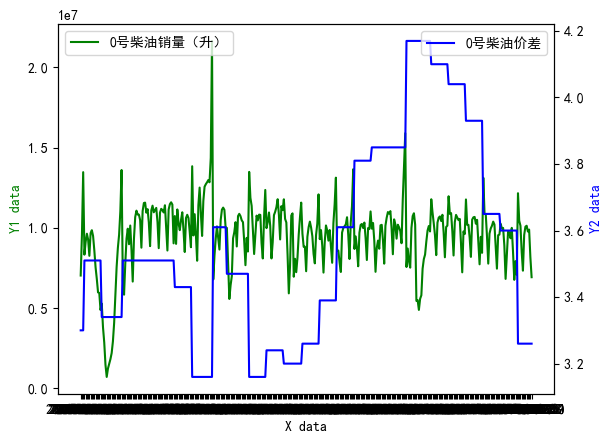

In [2]:
# 双折线图

import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 创建一个图表和轴对象
fig, ax1 = plt.subplots()

# 绘制第一条曲线
ax1.plot(df[COLS_X], df[COLS_Y1], 'g-', label=COLS_Y1)
ax1.set_xlabel(COLS_X)
ax1.set_ylabel(COLS_Y1, color='g')

# 利用twinx()创建第二个Y轴
ax2 = ax1.twinx()

# 绘制第二条曲线
ax2.plot(df[COLS_X], df[COLS_Y2], 'b-', label=COLS_Y2)
ax2.set_ylabel(COLS_Y2, color='b')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()

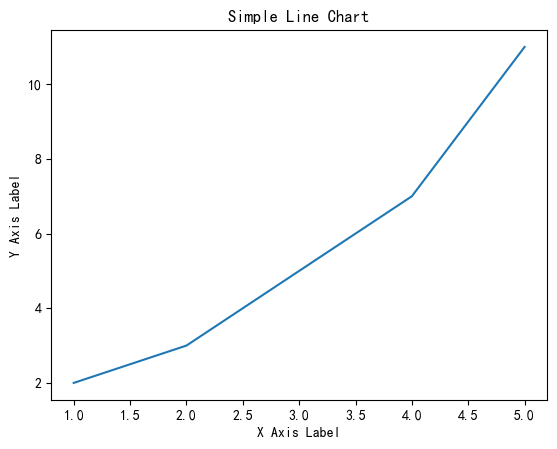

In [20]:
# 单折线图

# 准备数据
x = [1, 2, 3, 4, 5]  # X轴数据
y = [2, 3, 5, 7, 11] # Y轴数据

# 绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('Simple Line Chart')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# 显示图表
plt.show()